# Iris Playground - Part 2
### Instructors: Vagelis Papalexakis, Yorgos Tsitsikas
### Code and Responses: Amirsadra Mohseni
### University of California, Riverside

In this assignment we will implement two different supervised learning models:
1. linear regression (using gradient descent), and
2. k-nearest neighbor classification.

As we did in part 1, here we will also use the Iris dataset. Below are some useful imports and some data bookkeeping:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand
from sklearn.model_selection import train_test_split
from collections import Counter
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', names = data_names)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 1. Linear Regression
The first model we will implement is Linear Regression using Gradient Descent. 

###  Getting the Data
In order to properly test linear regression, we first need to find a set of correlated variables, so that we use one to predict the other. Consider the following scatterplots:

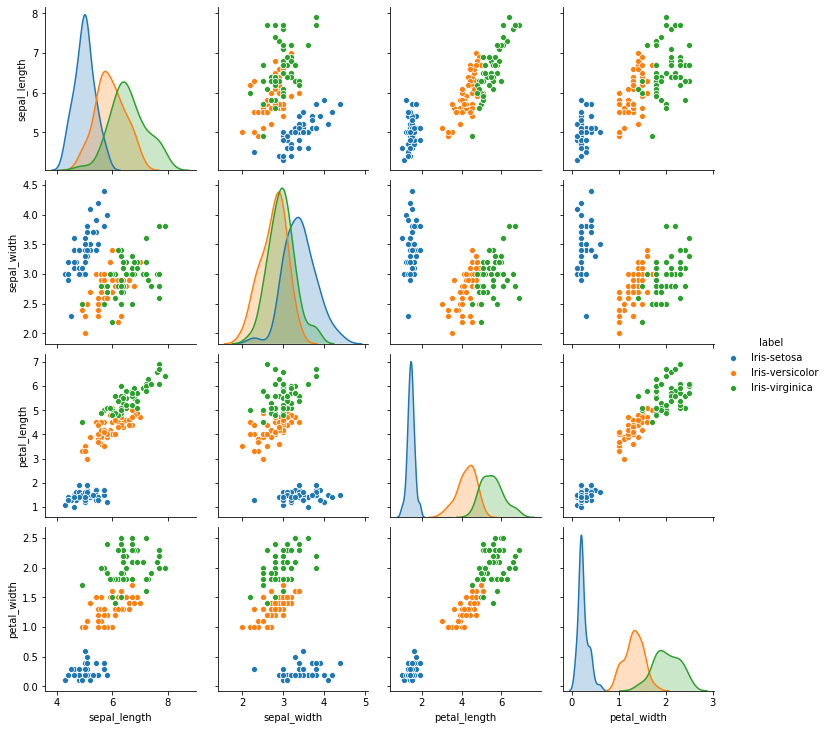

In [3]:
sb.pairplot(data, hue = 'label')

We observe that sepal length and petal width for Iris-versicolor and Iris-virginica are reasonably correlated, so we are going to take those two variables for those two classes and use one to regress on the other.

In [4]:
sub_data = data.loc[data['label'] != 'Iris-setosa', :]
y = sub_data['petal_width'].values
x = sub_data['sepal_length'].values

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

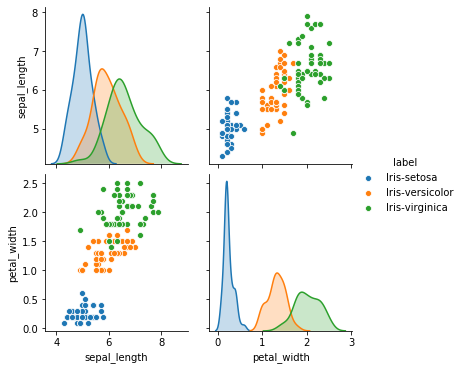

In [5]:
sb.pairplot(data[['sepal_length', 'petal_width', 'label']], hue = 'label')

### Section 1a: Gradient descent for linear regression
Here we will implement the gradient descent version of linear regression.
In particular, the function implemented should follow the following format:
```python
def linear_regression_gd(x,y,lr = 0.00001,max_iter=10000,tol=pow(10,-5)):
```
Where 'x' is the training data feature(s), 'y' is the variable to be predicted, 'lr' is the learning rate used, 'max_iter' defines the maximum number of iterations that gradient descent is allowed to run, and 'tol' is defining the tolerance for convergence (which we'll discuss next).

The return values for the above function should be (at the least) 1) 'theta' which are the regression parameters, 2) 'all_cost' which is an array where each position contains the value of the objective function $J(\theta)$ for a given iteration, 3) 'iters' which counts how many iterations did the algorithm need in order to converge to a solution.

Gradient descent is an iterative algorithm; it keeps updating the variables until a convergence criterion is met. In our case, our convergence criterion is whichever of the following two criteria happens first:

- The maximum number of iterations is met
- The relative improvement in the cost is not greater than the tolerance we have specified. For this criterion, you may use the following snippet into your code:
```python
np.absolute(all_cost[it] - all_cost[it-1])/all_cost[it-1] <= tol
```

In [6]:
def linear_regression_gd(x, y, lr=0.00001, max_iters=10000, tolerance=pow(10, -5)):
    all_cost = []
    
    # y = mx + b
    m = 0
    b = 0
    y_pred = m * x + b
    
    J = np.mean((y_pred - y) ** 2) # Mean squared error
    all_cost.append(J)
    
    for it in range(1, max_iters):
        partial_deriv_m = sum(x * (y - y_pred))
        partial_deriv_b = sum(y - y_pred)
        
        m += (lr * partial_deriv_m)
        b += (lr * partial_deriv_b)
        
        y_pred = m * x + b  # New prediction
        
        J = np.mean((y_pred - y) ** 2)
        all_cost.append(J)
        
        if ((np.absolute(all_cost[it] - all_cost[it - 1]) / all_cost[it - 1]) <= tolerance):
            return m[0], b[0], all_cost, it
    
    return m[0], b[0], all_cost, max_iters

linear_regression_gd(x, y)

(0.2619527755435295,
 0.04016273291969482,
 [2.9876000000000005,
  2.759417726638907,
  2.549403871206449,
  2.3561118200147173,
  2.1782101422811415,
  2.014473418985009,
  1.8637738019527825,
  1.7250732450295894,
  1.597416353823769,
  1.4799238047721688,
  1.371786288195496,
  1.2722589336223513,
  1.1806561789825432,
  1.0963470483277258,
  1.018750805551422,
  0.9473329541704477,
  0.8816015556134775,
  0.8211038406564457,
  0.7654230906637121,
  0.7141757671524046,
  0.6670088699078381,
  0.6235975054522208,
  0.5836426491178027,
  0.5468690853092113,
  0.5130235117671184,
  0.48187279477504896,
  0.45320236329087604,
  0.4268147309414754,
  0.4025281356997665,
  0.38017528787398114,
  0.35960221778507623,
  0.34066721519487614,
  0.3232398531795312,
  0.30720008972454854,
  0.2924374408530143,
  0.27885021959136164,
  0.2663448355305365,
  0.2548351501578118,
  0.24424188351865017,
  0.23449206812159593,
  0.22551854632458976,
  0.2172595077406077,
  0.20965806347619254,
  0.20

### Section 1b: Convergence plots
After implementing gradient descent for linear regression, we would like to test that indeed our algorithm converges to a solution. In order see this, we are going to look at the value of the objective/loss function $J(\theta)$ as a function of the number of iterations, and ideally, what we would like to see is $J(\theta)$ drops as we run more iterations, and eventually it stabilizes. 

The learning rate plays a big role in how fast our algorithm converges: a larger learning rate means that the algorithm is making faster strides to the solution, whereas a smaller learning rate implies slower steps. In this question we are going to test two different values for the learning rate:
- 0.00001
- 0.000001

while keeping the default values for the max number of iterations and the tolerance.


- Plot the two convergence plots (cost vs. iterations)

- What do you observe?

<b>Important</b>: In reality, when we are running gradient descent, we should be checking convergence based on the <i>validation</i> error (i.e., we would have to split our training set into a e.g., 70/30 training'/validation subsets, use the new training' set to calculate the gradient descent updates and evaluate the error both on the training' set and the validation set, and as soon as the validation loss stops improving, we stop training. <b>In order to keep things simple, in this project we are only looking at the training loss</b>, but as long as you have a function 
```python
def compute_cost(x,theta,y):
```
that calculates the loss for a given x, y, and set of parameters you have, you can always compute it on the validation portion of x and y (that are <b>not</b> used for the updates).  

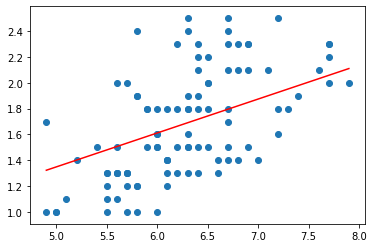

In [9]:
m, b, all_cost_5, it = linear_regression_gd(x, y, 0.00001)

Y_pred = m * x + b

plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [11]:
Y_pred = m * 6 + b

Y_pred

1.6118793861808718

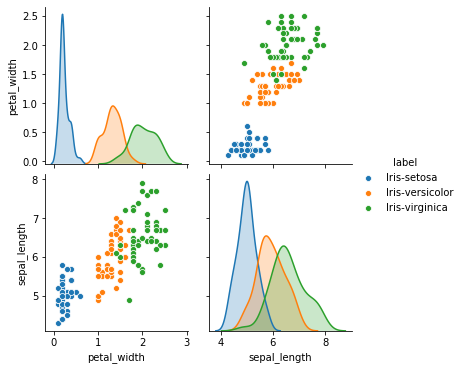

In [12]:
sb.pairplot(data[['petal_width', 'sepal_length', 'label']], hue = 'label')

Text(0, 0.5, 'Cost')

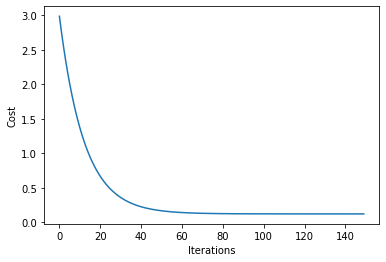

In [13]:
#This may also be useful: augment x with a new column for the bias term
#x_new = np.concatenate((np.ones(len(x)).reshape(-1, 1),x),axis=1)

m_5, b_5, all_cost_5, it_5 = linear_regression_gd(x, y, 0.00001)
m_6, b_6, all_cost_6, it_6 = linear_regression_gd(x, y, 0.000001)

plt.plot(all_cost_5)
plt.xlabel("Iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

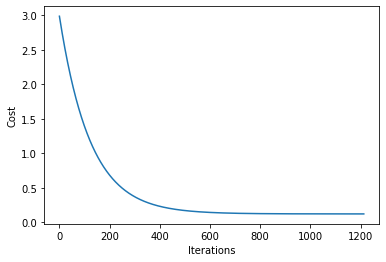

In [14]:
plt.plot(all_cost_6)
plt.xlabel("Iterations")
plt.ylabel("Cost")

In [15]:
print("Learning rate of 0.00001 took %d iterations" %it_5)

Learning rate of 0.00001 took 149 iterations


In [16]:
print("Learning rate of 0.000001 took %d iterations" %it_6)

Learning rate of 0.000001 took 1213 iterations


A smaller learning rate makes the cost function take longer to converge.

## 2. K-Nearest Neighbors Classifier
The K-Nearest Neighbors Classifier is one of the most popular instance-based (and in general) classification models. In this section, we will implement our own version and test in different scenarios.

### Section 2a: Implement the K-NN Classifier
For the implementation, our function should have the format:
```python
def knnclassify(test_data,training_data, training_labels, K=1):
```
where 'test_data' contains test data points, 'training_data' contains training data points, 'training_labels' holds the training labels, and 'K' is the number of neighbors. 

The output of this function should be 'pred_labels' which contains the predicted label for each test data point (it should, therefore, have the same number of rows as 'test_data').

The piece of code below prepares the Iris dataset by converting the labels from strings to integers (which is quite easier to move around and do calculations with):

In [17]:
all_vals = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
all_labels = data['label'].values
unique_labels = np.unique(all_labels)
#change string labels to numbers
new_labels = np.zeros(len(all_labels))
for i in range(0,len(unique_labels)):
    new_labels[all_labels == unique_labels[i]] = i
all_labels = new_labels

In [18]:
def knnclassify(test_data, training_data, training_labels, K=1):
    pred_labels = []
    distance = []
    
    if type(test_data) == pd.core.frame.DataFrame:
        for index, row in test_data.iterrows():
            dist = np.linalg.norm(np.array(row) - np.array(training_data), axis=1)

            distance = dict(zip(dist, training_labels)) # Assign distances with labels
            distance = sorted(distance.items()) # sort based on keys

            k_nearest = distance[0:K]

            pred_labels.append(Counter([tup[1] for tup in k_nearest]).most_common(1)[0][0])
            
    elif type(test_data) == np.ndarray:
        for row in test_data:
            dist = np.linalg.norm(row - training_data, axis=1)

            distance = dict(zip(dist, training_labels)) # Assign distances with labels
            distance = sorted(distance.items()) # sort based on keys

            k_nearest = distance[0:K]

            pred_labels.append(Counter([tup[1] for tup in k_nearest]).most_common(1)[0][0])
    
    return np.array(pred_labels)

In [20]:
# TESTING
# Setosa - Setosa - Versicolor
test_df = pd.DataFrame({'sepal_length':[4.2, 4.6, 6],
                         'sepal_width':[3.1, 3.3, 3],
                        'petal_length':[1.2, 1.5, 4],
                         'petal_width':[0.3, 0.2, 1.2],
                               'label':['', '', '']
               })

# Virginica
test_df2 = pd.DataFrame({'sepal_length':[6.5],
                          'sepal_width':[3.1],
                         'petal_length':[5],
                          'petal_width':[2],
                                'label':['']
               })

# predict test_df from data - All columns minus the labels
pred_labels = knnclassify(test_df2.iloc[:, :-1], data.iloc[:, :-1], all_labels, K=1)

# Translate encoded labels back to string
pred_labels_str = ['Iris-setosa' if label == 0 else 'Iris-versicolor' if label == 1 else 'Iris-virginica' for label in pred_labels]
pred_labels_str

['Iris-virginica']

In [21]:
# Virginica
test_df2 = pd.DataFrame({'sepal_length':[6.5],
                          'sepal_width':[3.1],
                         'petal_length':[5],
                          'petal_width':[2],
                                'label':['']
               })

In [22]:
pred_labels = knnclassify(test_df2.iloc[:, :-1], data.iloc[:, :-1], all_labels, K=1)

# Translate encoded labels back to string
pred_labels_str = ['Iris-setosa' if label == 0 else 'Iris-versicolor' if label == 1 else 'Iris-virginica' for label in pred_labels]
pred_labels_str

['Iris-virginica']

In [23]:
pred_labels = knnclassify(test_df.iloc[:, :-1], data.iloc[:, :-1], all_labels, K=1)

# Translate encoded labels back to string
pred_labels_str = ['Iris-setosa' if label == 0 else 'Iris-versicolor' if label == 1 else 'Iris-virginica' for label in pred_labels]
pred_labels_str

['Iris-setosa', 'Iris-setosa', 'Iris-versicolor']

### Section 2b: Measuring performance

In this question we will evaluate the average performance of our classifier for different values of $K$. In particular, $K$ will range in $\{1,\cdots,8\}$. We are going to measure the performance using classification accuracy. For computing the accuracy, we use
```python
accuracy = sum(test_labels == pred_labels)/len(test_labels)
```
where 'test_labels' are the actual class labels and 'pred_labels' are the predicted labels


In order to get a proper estimate for the accuracy for every K, we need to run multiple iterations where for each iteration we get a different randomized split of our data into train and test. In this question, we are going to run 100 iterations for every K, and for every random splitting, we use:

```python
    (training_data, test_data, training_labels, test_labels) = train_test_split(all_vals, all_labels, test_size=0.3)
```
where the train/test ratio is 70/30. 

After computing the accuracy for every $K$ for every iteration, we will have 100 accuracies per $K$. The best way to store those accuracies is in a matrix that has as many rows as values for $K$ and 100 columns, each one for each iteration.

Compute average accuracy as a function of $K$. Because we have a randomized process, we also need to compute how certain/uncertain our estimation for the accuracy per $K$ is. For that reason, we also need to compute the standard deviation of the accuracy for every $K$. Having computed both average accuracy and standard deviation, make a figure that shows the average accuracy as a function of $K$ with each point of the figure being surrounded by an error-bar encoding the standard deviation. The following function: 
```python
plt.errorbar()
```
is useful for this plot.

In [24]:
def measure_knn_accuracy(all_vals, all_labels, test_size=0.3, iterations=100, max_k=1):
    rows, cols = max_k, iterations
    accuracy_matrix = np.zeros((rows, cols))
    
    for k in range(0, max_k):
        for i in range(0, iterations):
            (training_data, test_data, training_labels, test_labels) = train_test_split(all_vals, all_labels, test_size=test_size)
            pred_labels = knnclassify(test_data, training_data, training_labels, K=k+1)

            accuracy_matrix[k][i] = sum(test_labels == pred_labels)/len(test_labels)
            
    return accuracy_matrix

In [25]:
accuracy_matrix = measure_knn_accuracy(all_vals, all_labels, 0.3, 100, 8)
avg_acc_matrix = accuracy_matrix.mean(1)
std = accuracy_matrix.std(1)

In [26]:
k = np.array([1, 2, 3, 4, 5, 6, 7, 8])

<ErrorbarContainer object of 3 artists>

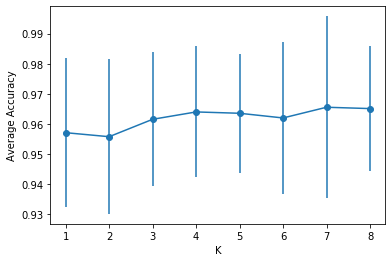

In [27]:
plt.xlabel('K')
plt.ylabel('Average Accuracy')
plt.errorbar(k, avg_acc_matrix, std, marker='o')

### Section 2c: Feature selection

A good or bad set of features can make or break our model! Here we will see what happens when we operate on a subset of the features, and in particular in
- a subset that has good separability of classes
- a subset that has poor separability of classes

Recall from part 1 where we did the scatterplots of the Iris dataset that a pair of features with high visual separability is (petal length, sepal width), whereas a set that confuses at least two classes is (sepal length, sepal width). 

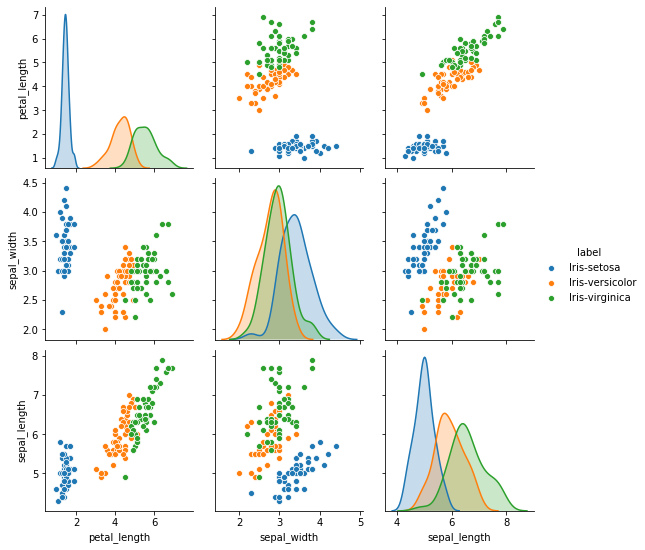

In [28]:
sb.pairplot(data[['petal_length','sepal_width','sepal_length','label']], hue = 'label')

We apply K-NN classification with K = 1 on two datasets (using the same train/test split for both datasets, and the same method we used to split as above) and measure the classification accuracy for:
- Only (petal length, sepal width) [2.5%]
- Only (sepal length, sepal width) [2.5%]

What do we observe regarding the classification accuracy?

In [29]:
petal_length_sepal_width = np.array(data[['petal_length', 'sepal_width']])

accuracy_matrix = measure_knn_accuracy(petal_length_sepal_width, all_labels)
avg_acc_matrix = accuracy_matrix.mean(1)

print(round(avg_acc_matrix[0] * 100, 2))

91.0


In [30]:
sepal_length_sepal_width = np.array(data[['sepal_length', 'sepal_width']])

accuracy_matrix = measure_knn_accuracy(sepal_length_sepal_width, all_labels)
avg_acc_matrix = accuracy_matrix.mean(1)

print(round(avg_acc_matrix[0] * 100, 2))

71.8


As we can observe, the datasets that contained a pair of features with a low separability of classes (septal length and width) contribute to a lower accuracy for our KNN classifier (71% accuracy, compared to %92 for petal length and sepal width which are more separable).